In [2]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import fitsio
sys.path.append('../')
from xd import *
from run_DMASS_Y3 import *
from utils import *
import healpy as hp
from systematics import *
from cmass_modules import io
os.chdir('../../DMASS_XDGMM/code_py3/')
print(os.getcwd())
from xdgmm import XDGMM as XDGMM_Holoien
os.chdir('../../DMASSY3/code_py3/')
print(os.getcwd())

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


/users/PCON0003/warner785/DMASS_XDGMM/code_py3
/users/PCON0003/warner785/DMASSY3/code_py3


In [3]:
#loading in all of y3 gold:

input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
input_keyword = 'full_spt_'
#input_keyword ='test_'
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z', 'EXTENDED_CLASS_MASH_SOF', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z']
gold = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)


Calling catalogs >>>
full_spt_000034.fits
full_spt_000001.fits
full_spt_000032.fits
full_spt_000027.fits
full_spt_000022.fits
full_spt_000025.fits
full_spt_000005.fits
full_spt_000021.fits
full_spt_000010.fits
full_spt_000012.fits
full_spt_000004.fits
full_spt_000033.fits
full_spt_000016.fits
full_spt_000013.fits
full_spt_000024.fits
full_spt_000006.fits
full_spt_000031.fits
full_spt_000015.fits
full_spt_000020.fits
full_spt_000002.fits
full_spt_000026.fits
full_spt_000017.fits
full_spt_000011.fits
full_spt_000008.fits
full_spt_000029.fits
full_spt_000028.fits
full_spt_000023.fits
full_spt_000014.fits
full_spt_000019.fits
full_spt_000007.fits
full_spt_000003.fits
full_spt_000030.fits
full_spt_000018.fits
full_spt_000009.fits
reading 1/34 /fs/scratch/PCON0008/warner785/bwarner/full_spt_000034.fits
reading 2/34 /fs/scratch/PCON0008/warner785/bwarner/full_spt_000001.fits
reading 3/34 /fs/scratch/PCON0008/warner785/bwarner/full_spt_000032.fits
reading 4/34 /fs/scratch/PCON0008/warner785/b

In [4]:
# Call in st82 region to take out this portion of the gold catalog:

# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0008/warner785/bwarner/gold_full/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'gold_st82_final'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z', 'EXTENDED_CLASS_MASH_SOF', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z']
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes


Calling catalogs >>>
gold_st82_final_000056.fits
gold_st82_final_000003.fits
gold_st82_final_000026.fits
gold_st82_final_000121.fits
gold_st82_final_000094.fits
gold_st82_final_000040.fits
gold_st82_final_000010.fits
gold_st82_final_000082.fits
gold_st82_final_000068.fits
gold_st82_final_000075.fits
gold_st82_final_000103.fits
gold_st82_final_000112.fits
gold_st82_final_000043.fits
gold_st82_final_000125.fits
gold_st82_final_000083.fits
gold_st82_final_000101.fits
gold_st82_final_000016.fits
gold_st82_final_000031.fits
gold_st82_final_000041.fits
gold_st82_final_000052.fits
gold_st82_final_000092.fits
gold_st82_final_000027.fits
gold_st82_final_000127.fits
gold_st82_final_000095.fits
gold_st82_final_000114.fits
gold_st82_final_000079.fits
gold_st82_final_000045.fits
gold_st82_final_000086.fits
gold_st82_final_000007.fits
gold_st82_final_000029.fits
gold_st82_final_000055.fits
gold_st82_final_000076.fits
gold_st82_final_000069.fits
gold_st82_final_000105.fits
gold_st82_final_000100.fit

In [5]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [6]:
#training:
mask = (gold_st82['RA']>310) & (gold_st82['RA']<360)|(gold_st82['RA']<7)
mask = mask & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_train = gold_st82[mask]

# validation:
mask4 =(gold_st82['RA']>18)&(gold_st82['RA']<43)
mask4 = mask4 & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_val = gold_st82[mask4]

In [ ]:
# apply masks:
gold_st82_train = keepGoodRegion(gold_st82_train)
gold = keepGoodRegion(gold)

mask_magcut = priorCut_test(gold)
gold = gold[mask_magcut]

mask_magcut = priorCut_test(gold_st82_train)
gold_st82_train = gold_st82_train[mask_magcut]

gold_st82_train = gold_st82_train[(gold_st82_train['EXTENDED_CLASS_MASH_SOF'] == 3)]
gold = gold[(gold['EXTENDED_CLASS_MASH_SOF'] == 3)]

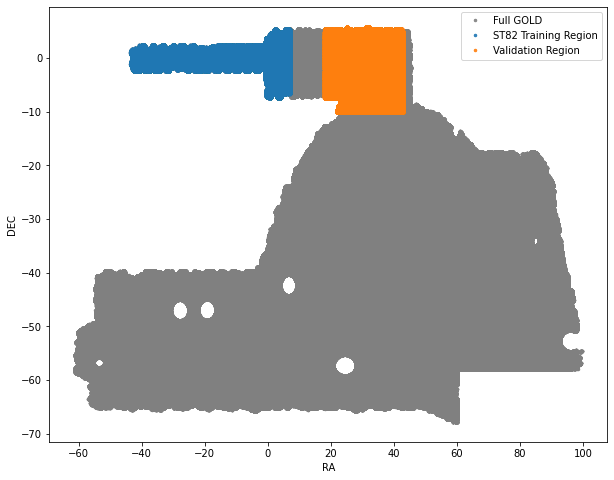

In [8]:
# checking footprint:
# add validation in different color
spatialcheck([gold, gold_st82_train, gold_st82_val], 
             label = ['Full GOLD','ST82 Training Region','Validation Region'], convert = None, ratag='RA',dectag='DEC')

In [ ]:
#take out training region 

st82_mask = np.in1d(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'], assume_unique=False, invert=False)
gold_spt = gold[~st82_mask]

gold_st82_check = gold[st82_mask]

index_mask = np.argsort(gold_spt['HPIX_4096'])
gold_spt_chron = gold_spt[index_mask] # ordered by hpix values


print(gold_spt_chron.size)
print(gold_st82_check.size)

# clear some memory
gold = []
gold_spt = []

In [ ]:
# checking footprint:
# add validation in different color
spatialcheck([gold_spt_chron], 
             label = ['SPT'], convert = None, ratag='RA',dectag='DEC')